# Heart Disease Analysis

## Read Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Heart_Disease_Dataset.csv')
numerical_columns = ['age', 'resting bp s','cholesterol', 'max heart rate', 'oldpeak']
nominal_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [2]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [3]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
print(f"Healthy: {(df['target'] == 0).sum()}")
print(f"Sick: {(df['target'] == 1).sum()}")
print(f"Total: {len(df)}")

Healthy: 561
Sick: 629
Total: 1190


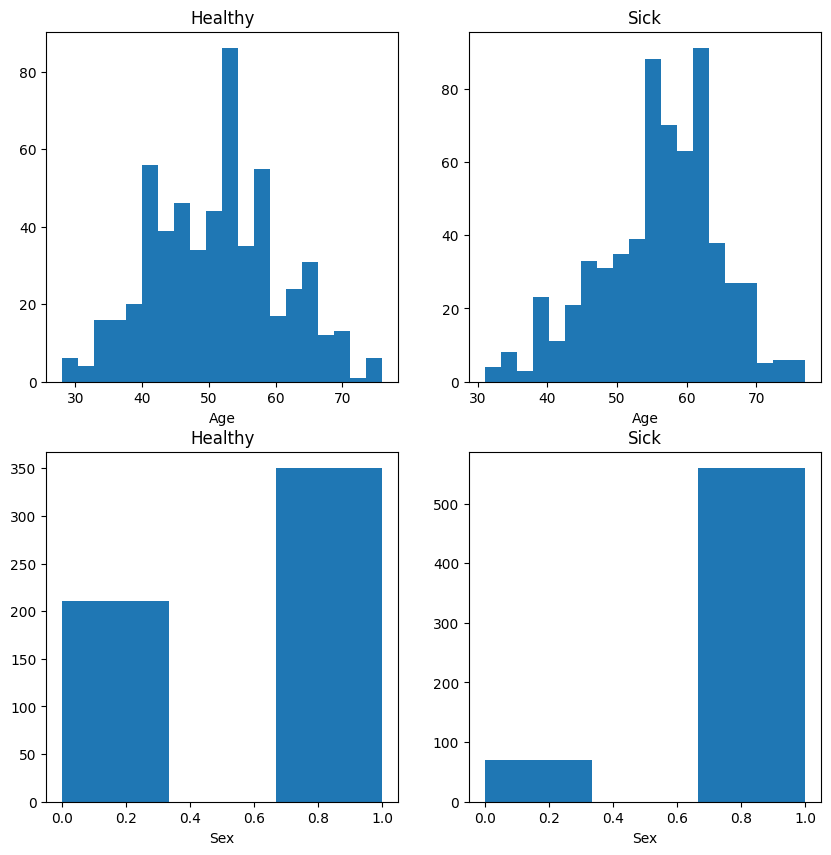

In [5]:
import matplotlib.pyplot as plt

def plot_age_sex(df):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.hist(df[df['target'] == 0]['age'], bins=20)
    plt.xlabel('Age')
    plt.title('Healthy')
    plt.subplot(2, 2, 2)
    plt.hist(df[df['target'] == 1]['age'], bins=20)
    plt.xlabel('Age')
    plt.title('Sick')
    plt.subplot(2, 2, 3)
    plt.hist(df[df['target'] == 0]['sex'], bins=3)
    plt.xlabel('Sex')
    plt.title('Healthy')
    plt.subplot(2, 2, 4)
    plt.hist(df[df['target'] == 1]['sex'], bins=3)
    plt.xlabel('Sex')
    plt.title('Sick')
    plt.show()

plot_age_sex(df)

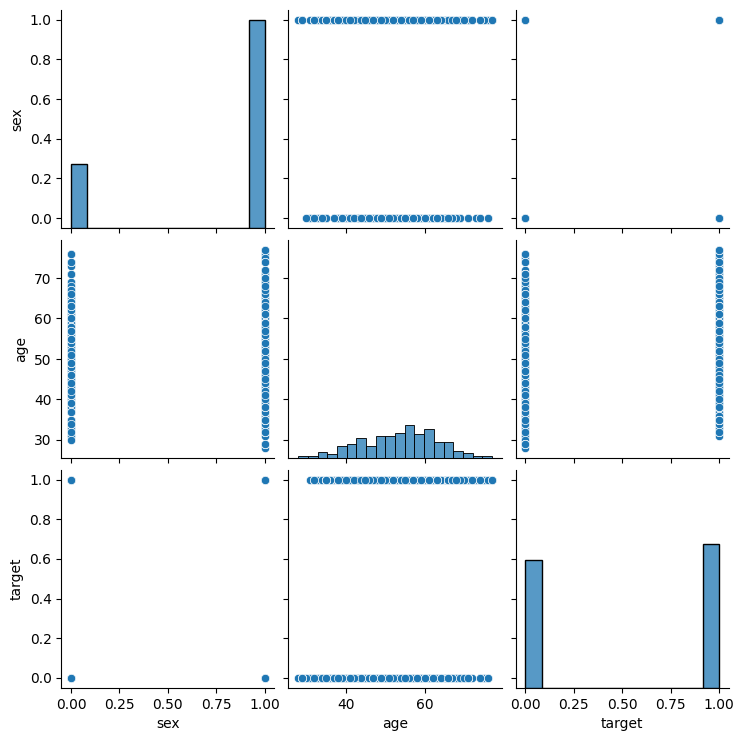

In [6]:
import seaborn as sns

sns.pairplot(df[['sex', 'age', 'target']])
plt.show()

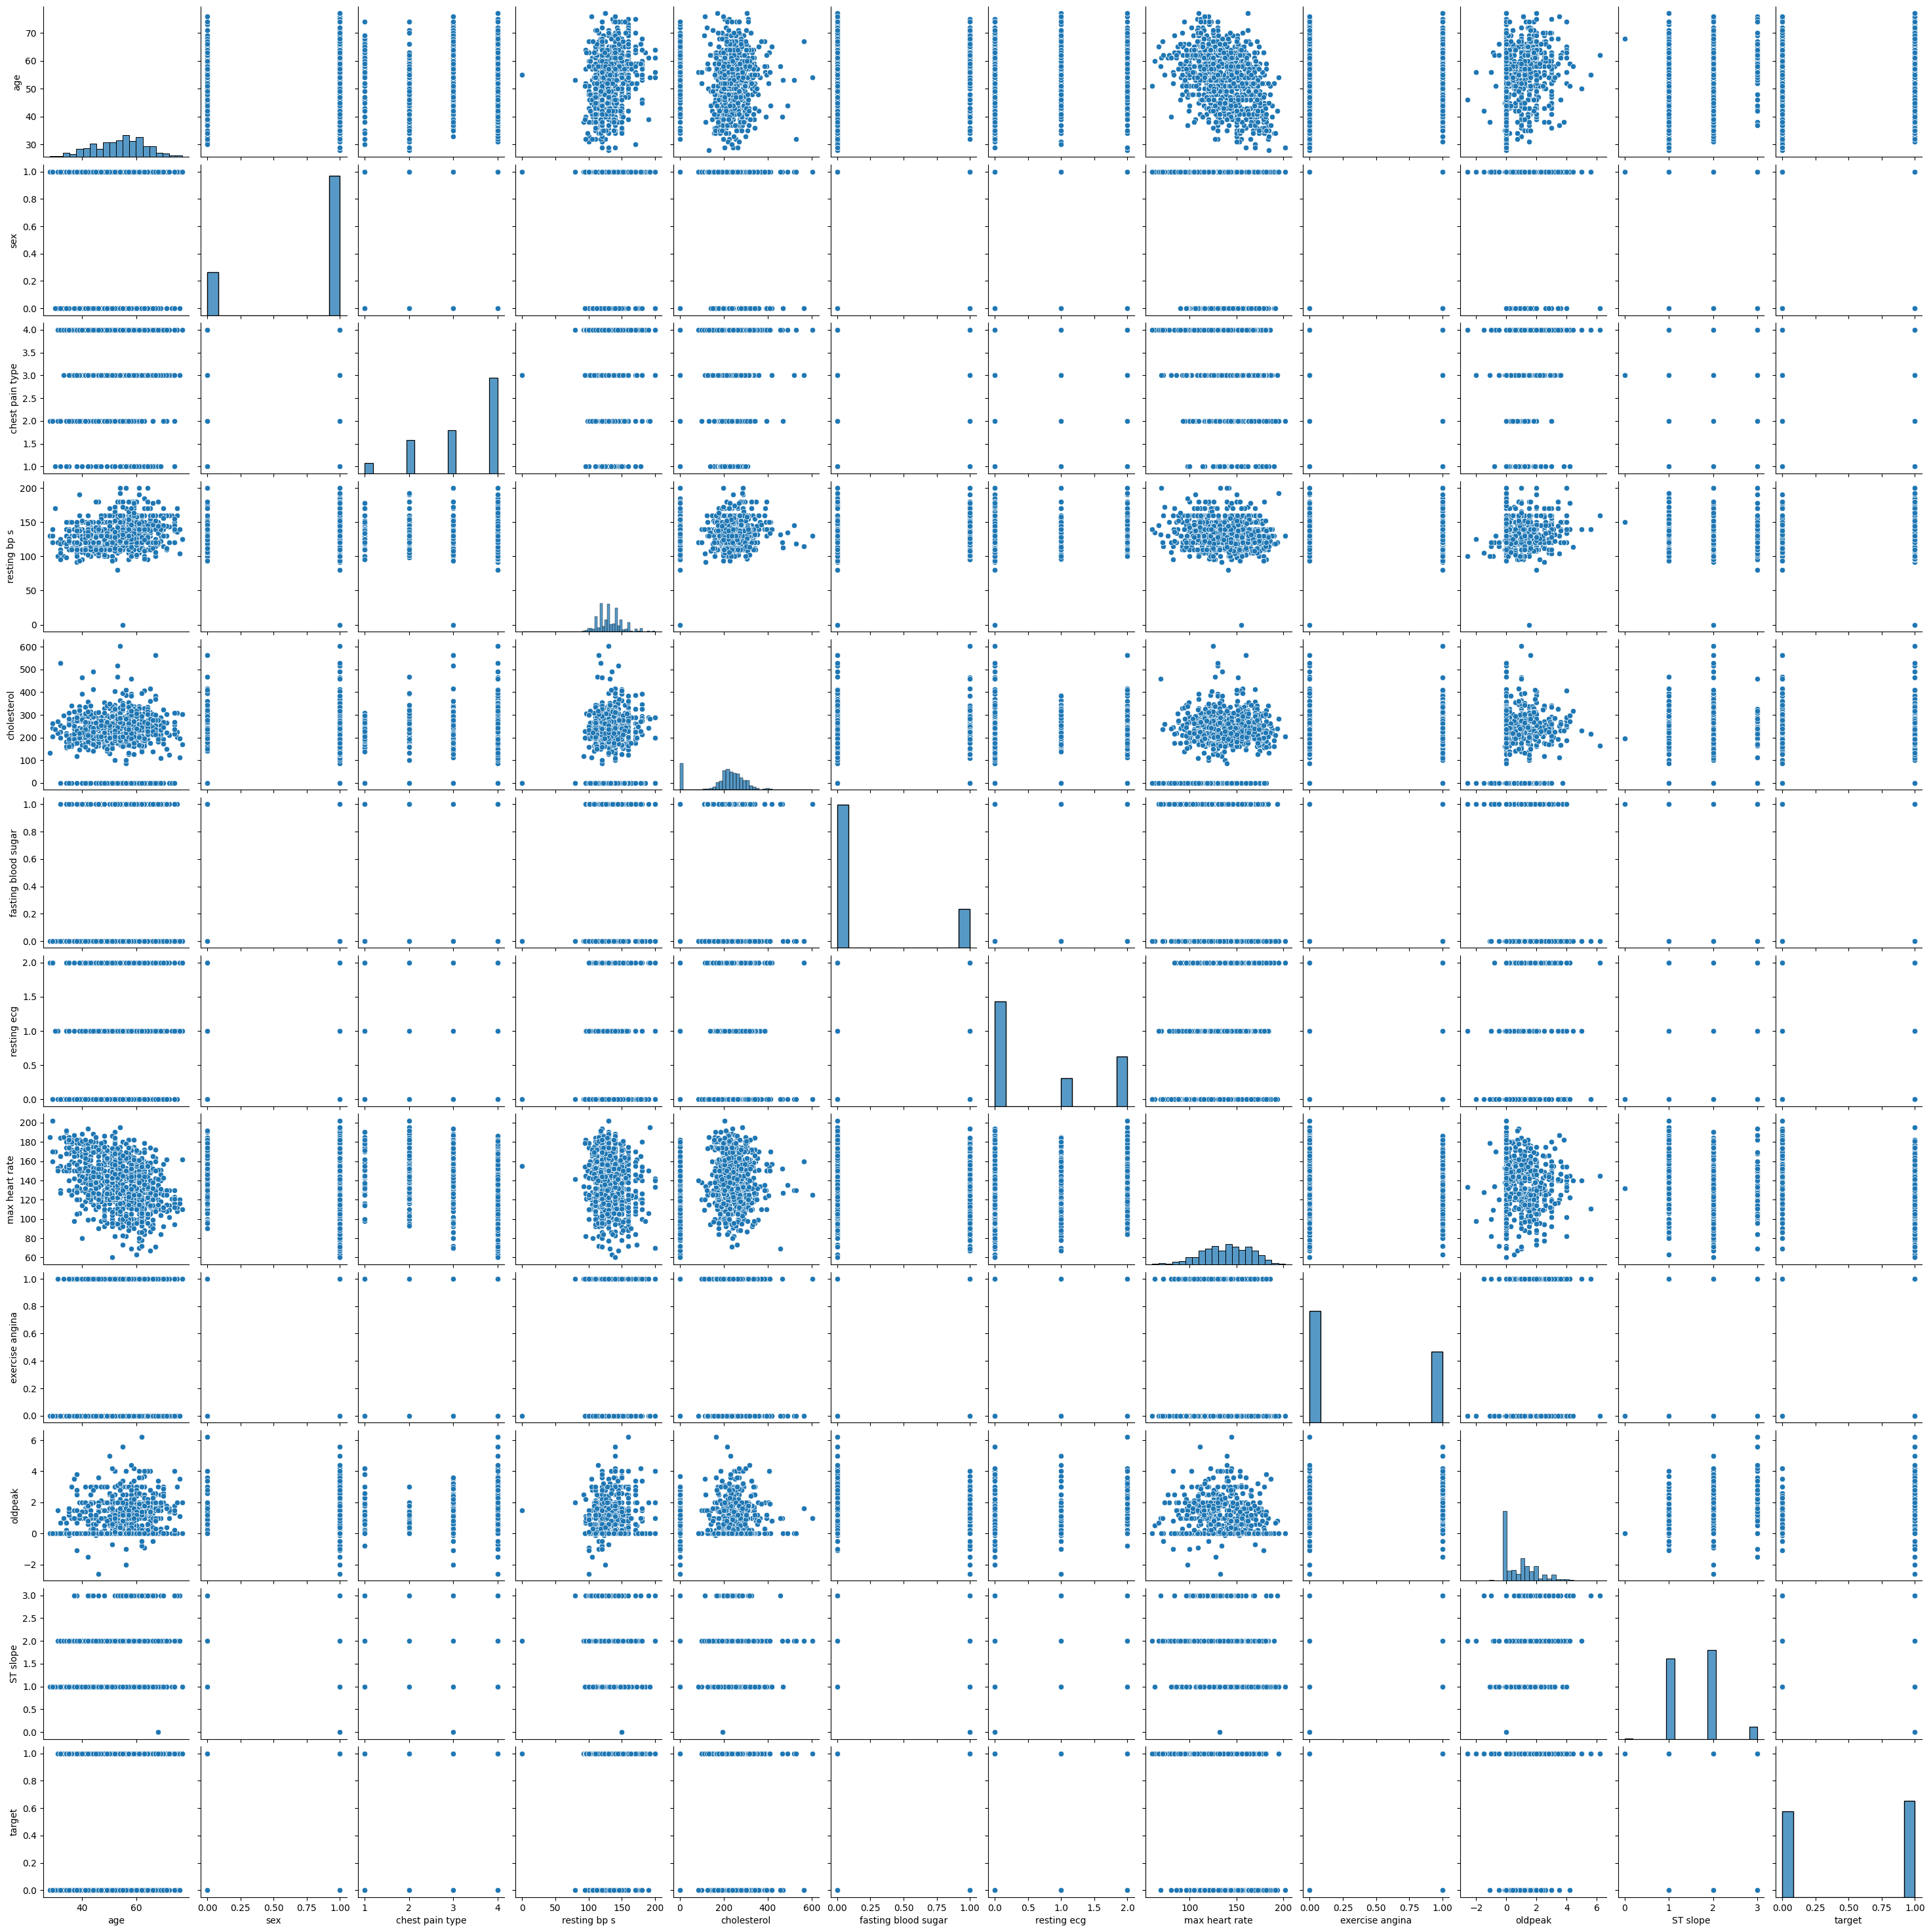

In [7]:
sns.pairplot(df)
plt.show()

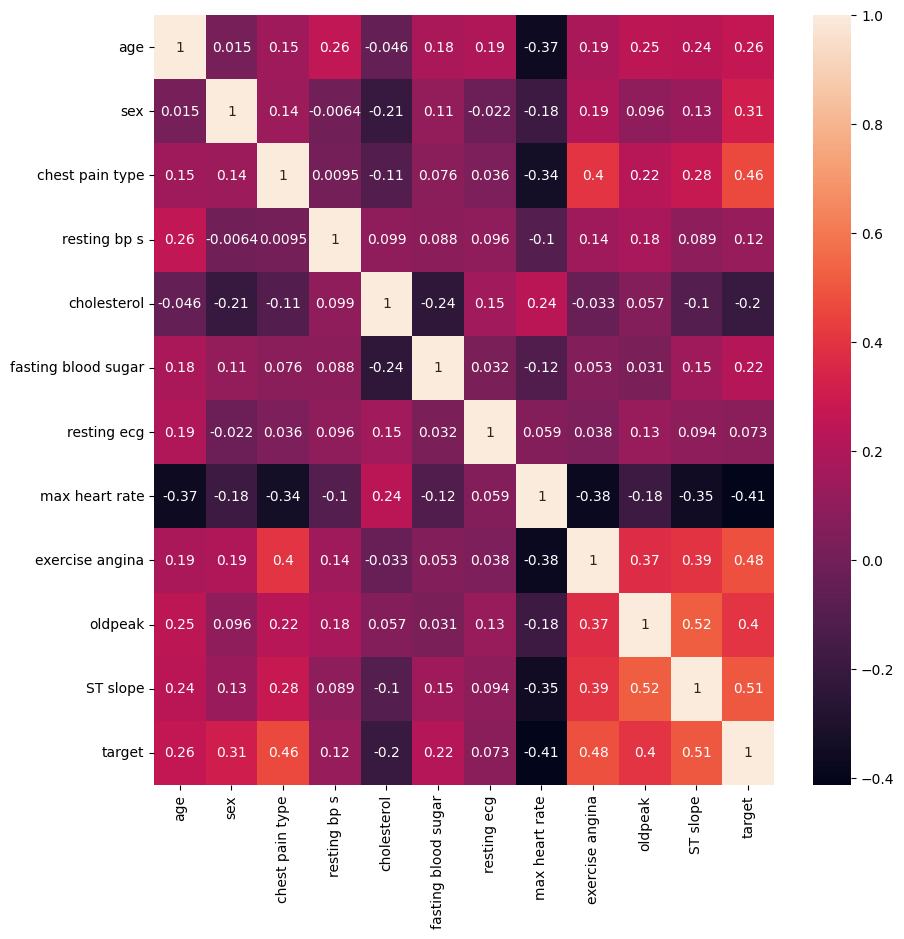

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Removing Outliers

In [9]:
def calculate_z_score(df: pd.DataFrame):
    mean = df.mean(axis=0)
    std = df.std(axis=0, ddof=0)
    std[std == 0] = 1
    return (df - mean) / std

z = calculate_z_score(df[numerical_columns])
clean_df = df[(z < 3).all(axis=1)]
outliers = df[(z >= 3).any(axis=1)]
print(f"Outliers: {len(outliers)}")
print(f"Clean: {len(clean_df)}")

Outliers: 24
Clean: 1166


In [10]:
clean_df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,53.681818,0.765009,3.230703,131.548885,208.610635,0.213551,0.691252,139.783019,0.385935,0.884305,1.610635,0.523156
std,9.385358,0.424175,0.934297,17.494002,99.221040,0.409989,0.867561,25.512500,0.487024,1.016188,0.601306,0.499678
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,120.250000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,228.000000,0.000000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,185.000000,491.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,1.000000


In [11]:
outliers.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,55.583333,0.708333,3.333333,161.541667,295.541667,0.208333,1.041667,137.291667,0.458333,2.791667,2.291667,0.791667
std,7.868024,0.464306,1.007220,31.960545,159.247136,0.414851,0.954585,26.199036,0.508977,2.232160,0.690253,0.414851
min,32.000000,0.000000,1.000000,114.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1.000000,0.000000
25%,53.750000,0.000000,3.000000,140.000000,217.000000,0.000000,0.000000,124.250000,0.000000,0.750000,2.000000,1.000000
50%,55.500000,1.000000,4.000000,160.000000,283.000000,0.000000,1.000000,140.000000,0.000000,3.000000,2.000000,1.000000
75%,61.000000,1.000000,4.000000,192.000000,303.000000,0.000000,2.000000,145.000000,1.000000,4.250000,3.000000,1.000000
max,67.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,1.000000


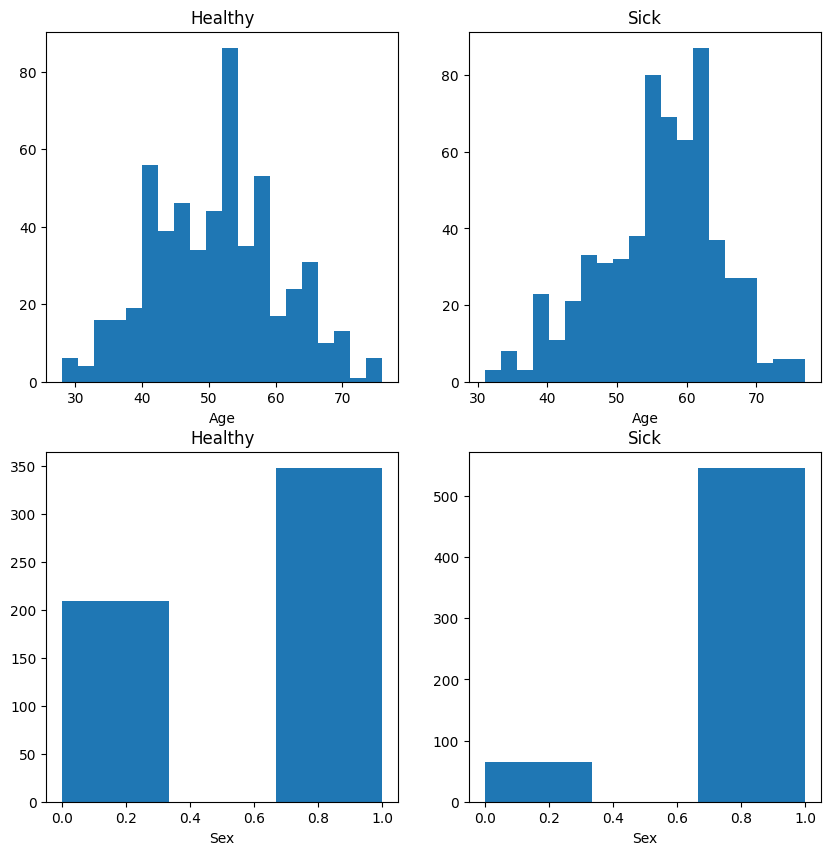

In [12]:
plot_age_sex(clean_df)

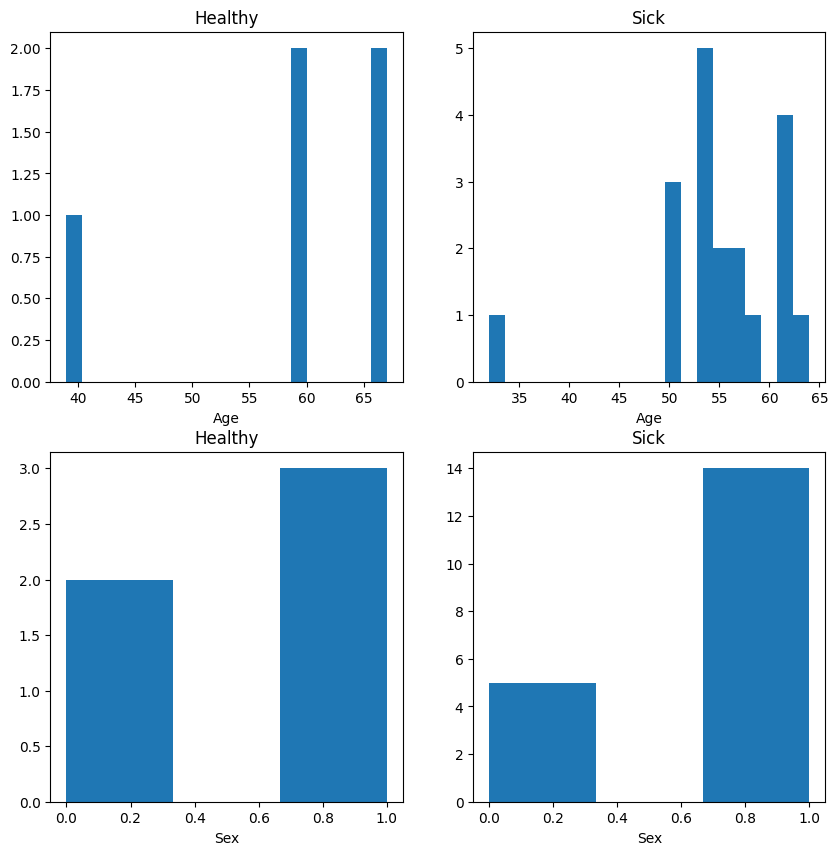

In [13]:
plot_age_sex(outliers)

## Normalization

In [14]:
normalized_df = clean_df.copy()
normalized_df[numerical_columns] = (normalized_df[numerical_columns] - normalized_df[numerical_columns].min()) / (
    normalized_df[numerical_columns].max() - normalized_df[numerical_columns].min())
normalized_df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,0.524119,0.765009,3.230703,0.711075,0.424869,0.213551,0.691252,0.561852,0.385935,0.527925,1.610635,0.523156
std,0.191538,0.424175,0.934297,0.094562,0.202080,0.409989,0.867561,0.179665,0.487024,0.153968,0.601306,0.499678
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,3.000000,0.648649,0.382892,0.000000,0.000000,0.424296,0.000000,0.393939,1.000000,0.000000
50%,0.530612,1.000000,4.000000,0.702703,0.464358,0.000000,0.000000,0.570423,0.000000,0.484848,2.000000,1.000000
75%,0.653061,1.000000,4.000000,0.756757,0.547862,0.000000,2.000000,0.704225,1.000000,0.621212,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = normalized_df.drop(columns=['target'])
y = normalized_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=137)

## SVM

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score

def evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"F1: {f1_score(y_test, y_pred):.2f}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    print(classification_report(y_test, y_pred))

### Linear Kernel

{'C': 0.03162277660168379}
Train:
Accuracy: 0.83
Recall: 0.86
Precision: 0.83
F1: 0.84
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       371
           1       0.83      0.86      0.84       445

    accuracy                           0.83       816
   macro avg       0.83      0.82      0.83       816
weighted avg       0.83      0.83      0.83       816

--------------------------------------------------
Test:
Accuracy: 0.84
Recall: 0.85
Precision: 0.82
F1: 0.84
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       185
           1       0.82      0.85      0.84       165

    accuracy                           0.84       350
   macro avg       0.84      0.84      0.84       350
weighted avg       0.84      0.84      0.84       350



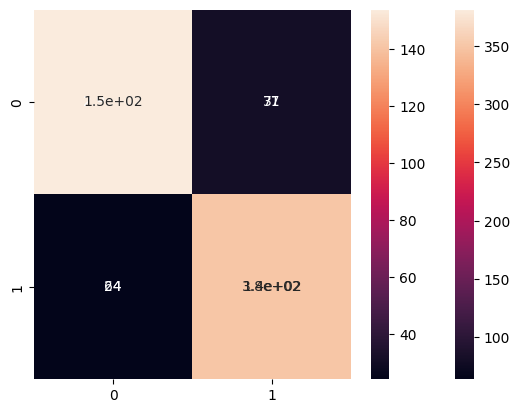

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    SVC(kernel='linear'), {
        'C': np.logspace(-2, 4, 13)
    }, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print('Train:')
evaluate(clf, X_train, y_train)
print('-' * 50)
print('Test:')
evaluate(clf, X_test, y_test)


### RBF Kernel

{'C': 1.0, 'gamma': 10.0}
Train:
Accuracy: 0.96
Recall: 0.98
Precision: 0.95
F1: 0.97
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       371
           1       0.95      0.98      0.97       445

    accuracy                           0.96       816
   macro avg       0.96      0.96      0.96       816
weighted avg       0.96      0.96      0.96       816

--------------------------------------------------
Test:
Accuracy: 0.85
Recall: 0.94
Precision: 0.79
F1: 0.86
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       185
           1       0.79      0.94      0.86       165

    accuracy                           0.85       350
   macro avg       0.86      0.86      0.85       350
weighted avg       0.87      0.85      0.85       350



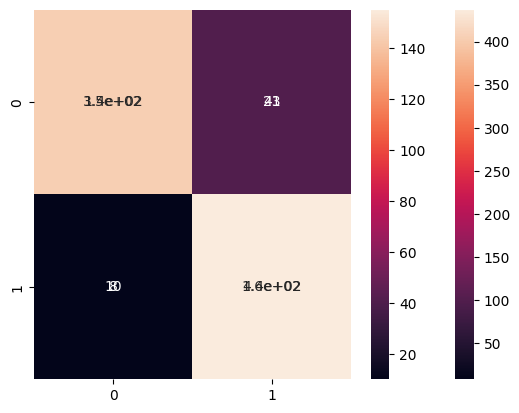

In [18]:
clf = GridSearchCV(
    SVC(kernel='rbf'), {
        'C': np.logspace(-2, 6, 17),
        'gamma': np.logspace(-6, 6, 25),
    }, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print('Train:')
evaluate(clf, X_train, y_train)
print('-' * 50)
print('Test:')
evaluate(clf, X_test, y_test)


### Polynomial Kernel

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ......................C=0.01, degree=2, gamma=1e-06; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-06; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-06; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-06; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-06; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-05; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-05; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-05; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-05; total time=   0.0s
[CV] END ......................C=0.01, degree=2, gamma=1e-05; total time=   0.0s
[CV] END .....................C=0.01, degree=2, gamma=0.0001; total time=   0.0s
[CV] END .....................C=0.01, degree=2,

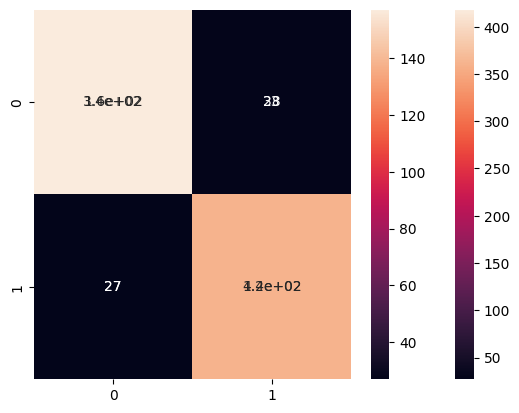

In [21]:
clf = GridSearchCV(
    SVC(kernel='poly'), {
        'C': [0.01, 0.1, 1],
        'gamma': np.logspace(-6, 1, 8),
        'degree': [2, 3, 4, 5],
    }, cv=5, scoring='accuracy', verbose=2)
clf.fit(X_train, y_train)
print(clf.best_params_)
print('Train:')
evaluate(clf, X_train, y_train)
print('-' * 50)
print('Test:')
evaluate(clf, X_test, y_test)
